# <a name="">**1. Introduction**</a>
**Loan Prediction** - dự đoán cho vay là một bài toán phân loại nhị phân về khả năng phê duyệt khoản vay của một ngân hàng đối với các khách hàng dựa vào các thông tin của khách hàng đó, với 2 nhãn cần phân loại: Y - khoản vay được phê duyệt, N - khoản vay không được phê duyệt.  

# <a name="">**2. Importing libraries and Loading the dataset**</a>
Nhập các thư viện cần thiết và đọc dữ liệu từ github.

## **Importing Libraries**

In [84]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Loading Dataset**

In [85]:
# clone Github repository
!git clone https://github.com/trinhngocphap/DS102.git
!ls DS102/

fatal: destination path 'DS102' already exists and is not an empty directory.
datasets_137197_325031_test_Y3wMUE5_7gLdaTN.csv
datasets_137197_325031_train_u6lujuX_CVtuZ9i.csv


In [86]:
# load the train and test dataset
train = pd.read_csv('DS102/datasets_137197_325031_train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv('DS102/datasets_137197_325031_test_Y3wMUE5_7gLdaTN.csv')

In [87]:
# make a copy of original data
# so that even if we have to make any changes in these datasets we would not lose the original datasets
train_original = train.copy()
test_original = test.copy()

# <a name="">**3. Exploratory Data Analysis (EDA)**</a>
Phân tích dữ liệu khám phá (Exploratory Data Analysis) là một phương pháp phân tích dữ liệu để tóm tắt các đặc điểm chính của các thuộc tính trong bộ dữ liệu, bằng cách sử dụng các phương pháp trực quan hoá. 

In [88]:
# take a look at the top 5 rows of the train set, notice the column "Loan_Status"
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [89]:
# take a look at the top 5 rows of the test set, notice the absense of "Loan_Status" that we will predict
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [90]:
# show the shape of the dataset i.e. no of rows, no of columns
train.shape, test.shape

((614, 13), (367, 12))

In [91]:
# calculate train-test-split ratio
train.shape[0]/(train.shape[0]+test.shape[0]), test.shape[0]/(train.shape[0]+test.shape[0])

(0.6258919469928644, 0.37410805300713557)

In [92]:
# take a look at the features in the dataset
train.columns, test.columns

(Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
       dtype='object'),
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
       dtype='object'))

**Nhận xét:** Có 13 thuộc tính và 614 điểm dữ liệu trong tập train, 12 thuộc tính và 367 điểm dữ liệu trong tập test. Tổng cộng 981 điểm dữ liệu trong cả 2 tập và tỉ lệ train-test tương ứng là khoảng 63%-27%. Các thuộc tính đều giống nhau ở tập train và tập test ngoại trừ thuộc tính Loan_Status bị thiếu ở tập test. Chúng ta sẽ xây dựng mô hình dự đoán Loan_Status.

In [93]:
# show the data types for each column of the train set
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [94]:
# summary of the dataset, info about index dtype, column dtypes, non-null values and memory usage
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Nhận xét:** Bộ dữ liệu của chúng ta gồm có 3 kiểu dữ liệu:

*   object: đại diện cho các biến phân loại (categorical variables). Các biến phân loại (categorical variables) trong bộ dữ liệu bao gồm: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status.
*   int64: đại diện cho các biến có giá trị nguyên (numerical variables). ApplicantIncome thuộc định dạng này.
*   float64: đại diện cho các biến có giá trị thập phân (numerical variables). Các biến thuộc định dạng này bao gồm: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History.






## **Univariate Analysis**
Phân tích đơn biến (Univariate analysis) là ta tiến hành phân tích từng biến riêng lẻ. Đối với các biến phân loại (categorical variables) ta sẽ sử dụng frequency table hoặc bar plot để tính toán số lượng từng loại trong biến đó. Đối với biến số (numerical variables) ta sẽ sử dụng histogram hoặc box plot để xem xét dạng phân phối đồ thị của biến đó. Với histogram, ta có thể kiểm tra xu hướng trung tâm, sự biến đổi, phương thức của phân phối các giá trị. Chú ý rằng histogram không thể biểu diễn được các ngoại lệ, do đó chúng ta sử dụng box plot để biểu diễn chúng.

### **Target Variable**
Đầu tiên chúng ta xem xét biến mục tiêu (target variable) là Loan_Status. Nó thuộc biến phân loại (categorical variables), chúng ta sẽ quan sát frequency table, percentage distribution và bar plot.

In [95]:
# frequency table of a variable will give us the count of each category in that variable
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [96]:
# percentage distribution can be calculated by setting the normalize=True to show proportions instead of number 
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

Text(0, 0.5, 'Number of observations')

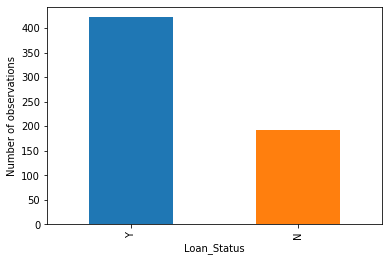

In [97]:
# bar plot to visualize the frequency
my_color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
train['Loan_Status'].value_counts().plot.bar(color=my_color)
plt.xlabel('Loan_Status')
plt.ylabel('Number of observations')

Số khoản vay được phê duyệt (Y) và không được phê duyệt (N) là 422 - 192 (69% - 31%), điều đó cho thấy bộ dữ liệu không cân bằng, ta cần phải đánh giá mô hình bằng độ đo thích hợp.

### **Categorical Independent Variable**
Bộ dữ liệu có 5 biến độc lập phân loại (categorical independent variables) bao gồm: Gender, Married, Self_Employed, Credit_History, Education. Ta quan sát bar plot của các biến trên tập train.

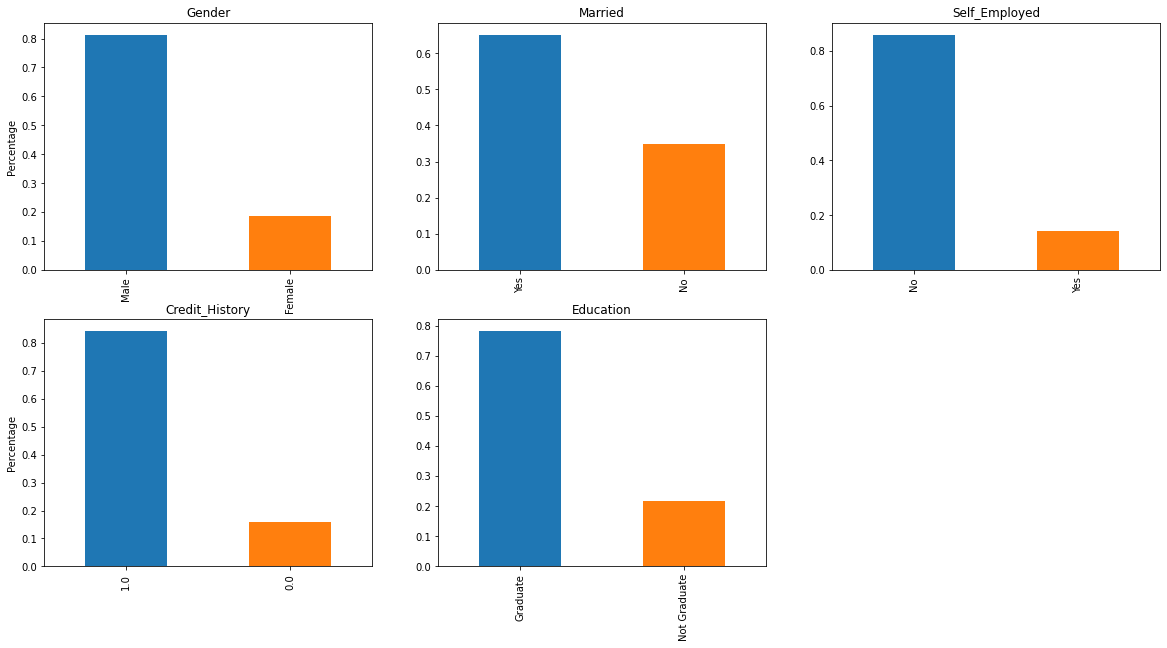

In [98]:
# visualizing categorical features
plt.subplot(231)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender', color=my_color)
plt.ylabel('Percentage')

plt.subplot(232)
train['Married'].value_counts(normalize=True).plot.bar(title='Married', color=my_color)

plt.subplot(233)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed', color=my_color)

plt.subplot(234)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History', color=my_color)
plt.ylabel('Percentage')

plt.subplot(235)
train['Education'].value_counts(normalize=True).plot.bar(title='Education', color=my_color)

plt.show()

Từ hình trên có thể suy ra:
* 80% các ứng viên là nam giới (Gender: Male);
* Khoảng 65% các ứng viên đã kết hôn (Married: Yes);
* Khoảng 15% các ứng viên kinh doanh tự do (Self_Employed: Yes);
* Khoảng 85% các ứng viên có lịch sử tín dụng (Credit_history: 1.0);
* Khoảng 80% các ứng viên đã tốt nghiệp (Education: Graduate).




### **Ordinal Independent Variable**
Bộ dữ liệu có 2 biến độc lập loại phân loại có cấp bập (ordinal independent variables) bao gồm: Dependents, Property_Area. Ta quan sát bar plot của các biến trên tập train.

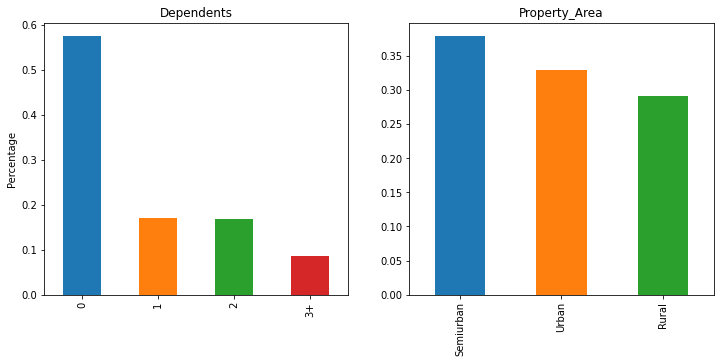

In [99]:
# visualizing remaining categorical features
plt.subplot(121)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,5), title='Dependents', color=my_color)
plt.ylabel('Percentage')

plt.subplot(122)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area', color=my_color)

plt.show()

Từ hình trên có thể suy ra:
*	Phần lớn các ứng viên không có bất kì người phụ thuộc nào (Dependents: 0);
*	Số lượng ứng viên trong mỗi khu vực tương đối đồng đều, cao nhất là ngoại thành (Property_Area: Semiurban).




### **Numerical Independent Variable**
Bộ dữ liệu có 4 biến độc lập dạng số (numerical independent variables) bao gồm: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term. Ta sẽ lần lượt phân tích từng biến.

Đầu tiên, chúng ta quan sát sự phân phối và box plot của biến ApplicantIncome.


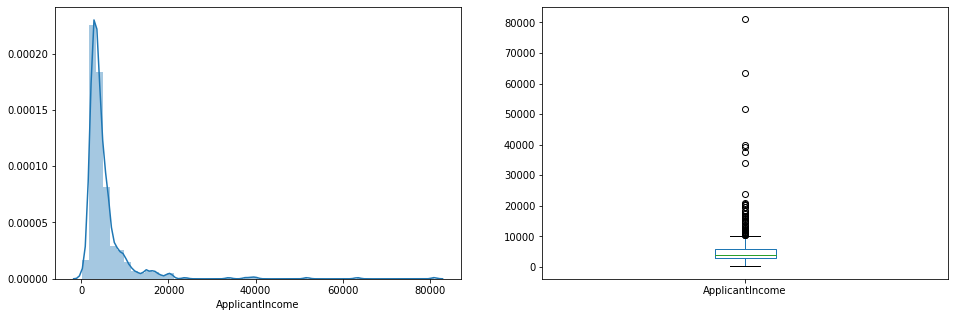

In [100]:
# visualizing ApplicantIncome
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

Ta có thể thấy hầu hết các dữ liệu trong phân phối của biến ApplicantIncome đều hướng về bên trái, điều đó có nghĩa là đây không phải là dạng phân phối chuẩn. Phân phối bị lệch phải (lệch dương). Chúng ta sẽ đưa nó về dạng phân phối chuẩn ở phần sau vì mô hình sẽ hoạt động tốt hơn khi dữ liệu tuân theo phân phối chuẩn. Box plot cho ta thấy có rất nhiều ngoại lệ trong dữ liệu của biến ApplicantIncome. Điều này có thể quy cho việc chênh lệch về thu nhập trong xã hội, một phần do trình độ học vấn khác nhau. 

Chúng ta tiếp tục phân tích ApplicantIncome thông qua Education.


Text(0.5, 0.98, '')

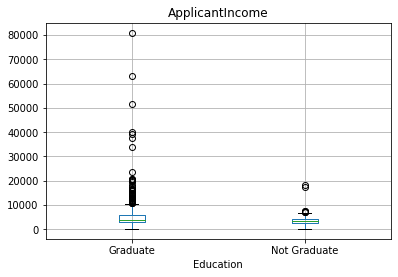

In [101]:
train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle("")

Ta có thể thấy có rất nhiều các ứng viên đã có bằng tốt nghiệp có thu nhập (ApplicantIncome) rất cao, nguyên nhân gây ra các ngoại lệ. Còn các ứng viên chưa tốt nghiệp thì rất ít các ngoại lệ.

Tiếp theo, ta quan sát biểu đồ phân phối và box plot của CoapplicantIncome.

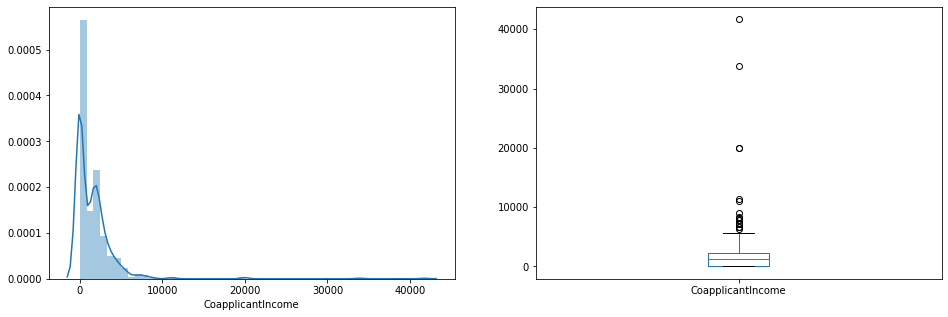

In [102]:
# visualizing CoapplicantIncome
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

Ta có thế thấy phân phối của CoapplicantIncome khá giống với ApplicantIncome, không phải là phân phối chuẩn, bị lệch phải (lệch dương) và box plot cũng cho thấy nhiều giá trị ngoại lệ.

Ta tiếp tục  với biến LoanAmount.

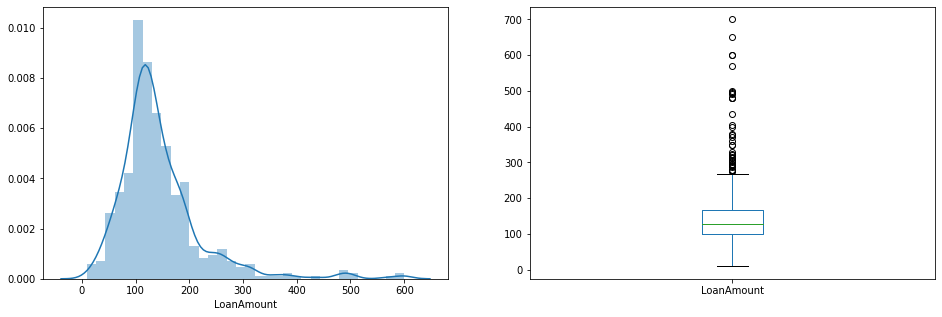

In [103]:
# visualizing LoanAmount
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount'])

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

Ta thấy biến LoanAmount có phân phối khá giống phân phối chuẩn (mặc dù hơi lệch phải) nhưng có rất nhiều ngoại lệ, chúng ta sẽ xử lý ngoại lệ ở phần sau.

Cuối cùng, ta quan sát phân phối của biến Loan_Amount_Term. Bởi vì Loan_Amount_Term là biến rời rạc nên ta sẽ sử dụng frequency table và bar plot để tính toán số lượng của từng giá trị trong biến.

In [104]:
# frequency table of a variable will give us the count of each category in that variable
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Text(0, 0.5, 'Percentage')

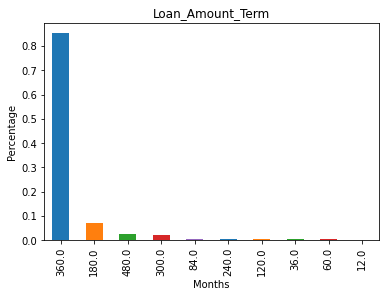

In [105]:
# plot bar chart
train['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title='Loan_Amount_Term', color=my_color)
plt.xlabel('Months')
plt.ylabel('Percentage')

Ta có thể thấy khoảng 85% khoản vay có thời hạn là 360 tháng (30 năm).

Tiếp theo, chúng ta muốn biết mỗi biến độc lập tương quan với biến mục tiêu (Loan_Status) như thế nào, chúng ta sẽ đi vào phần Bivariate analysis.

## **Bivariate Analysis**
Phân tích song biến (Bivariate analysis) là khi ta tiến hành phân tích mối quan hệ giữa hai biến số với nhau. Cụ thể, ta sẽ nghiên cứu mối quan hệ giữa các biến độc lập (independent variables) và biến mục tiêu (target variable).

### **Categorical Independent Variable versus Target Variable**
Trước tiên, ta sẽ quan sát mối quan hệ giữa biến độc lập phân loại (categorical independent variables) và biến mục tiêu (target variable). Các stacked bar plot bên dưới sẽ cho ta biết tỉ lệ các khoản vay được phê duyệt và không được phê duyệt với mỗi biến độc lập khác nhau.

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


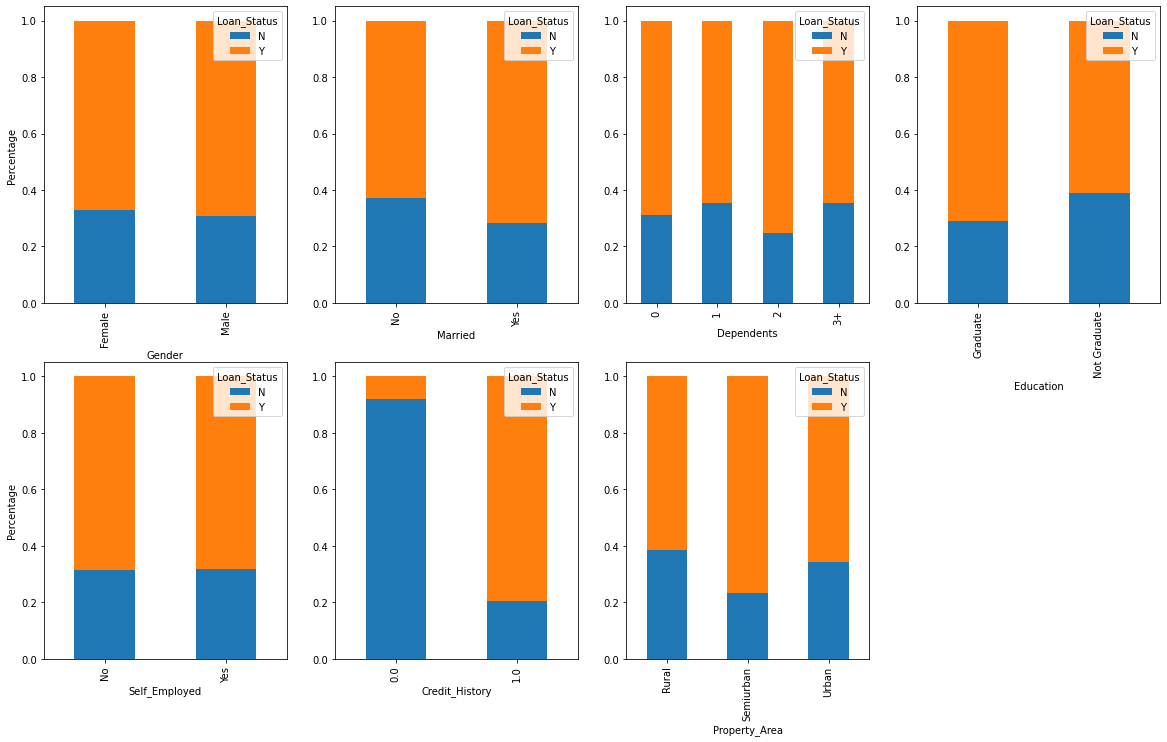

In [106]:
#visualizing categorical variables vs Loan_Status
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4)
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
print(Gender)
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax1, figsize=(20,12))

Married = pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax2)

Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax3)

Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax4)

Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax5)

Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax6)

Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax7)

fig.delaxes(ax8)

ax1.set(ylabel='Percentage')
ax5.set(ylabel='Percentage')

plt.show()

Từ hình trên, ta thấy:
*   Tỉ số các khoản vay được và không được phê duyệt của các ứng viên có giới tính nam và nữ gần như giống nhau;
*   Tỉ số khoản vay được phê duyệt của các ứng viên đã kết hôn cao hơn nhẹ so với các ứng viên chưa kết hôn;
*   Tỉ số khoản vay được và không được phê duyệt của các ứng viên có 1 và 3+ người phụ thuộc gần như giống nhau; 
*   Tỉ số khoản vay được phê duyệt của các ứng viên đã tốt nghiệp cao hơn so với các ứng viên chưa tốt nghiệp;
*   Tỉ số các khoản vay được và không được phê duyệt của các ứng viên có nghề nghiệp tự do và không có nghề nghiệp tự do gần như giống nhau;
*   Các ứng viên có lịch sử tín dụng là 1 có khả năng khoản vay được phê duyệt rất cao, ngược lại thì rất thấp;
*   Tỉ lệ khoản vay được phê duyệt của các ứng viên ở khu vực ngoại thành cao hơn so với ở nông thôn hoặc thành thị.



### **Numerical Independent Variable versus Target Variable**
Tiếp theo, ta sẽ quan sát mối quan hệ giữa biến độc lập dạng số (numerical independent variables) và biến mục tiêu (target variable).

Chúng ta sẽ xem xét sự khác nhau về mức thu nhập trung bình (ApplicantIncome) của các ứng viên có khoản vay được phê duyệt và không được phê duyệt.

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64


Text(0, 0.5, 'Mean of ApplicantIncome')

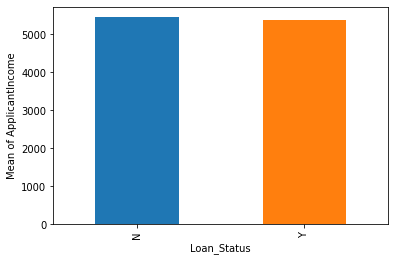

In [107]:
print(train.groupby('Loan_Status')['ApplicantIncome'].mean())

train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar(color=my_color)
plt.ylabel('Mean of ApplicantIncome')

Biểu đồ cột cho ta thấy không có sự biệt về thu nhập trung bình của 2 nhóm trên (5446 vs 5384).

Vì vậy, ta sẽ tạo các bin cho biến ApplicantIncome, dựa vào các giá trị trong đó và phân tích trạng thái khoản vay tương ứng cho mỗi bin.

In [108]:
# making bins for ApplicantIncome variable
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very high']
train['Income_bin'] = pd.cut(train['ApplicantIncome'], bins, labels=group)

In [109]:
# take a look at the train set
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High


Loan_Status   N    Y
Income_bin          
Low          34   74
Average      67  159
High         45   98
Very high    46   91


Text(0, 0.5, 'Percentage')

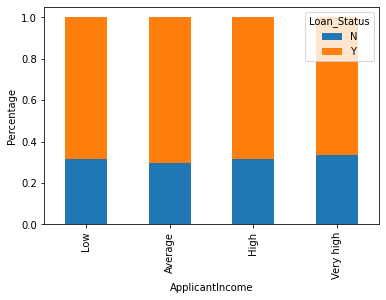

In [110]:
print(pd.crosstab(train['Income_bin'],train['Loan_Status']))

Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

Từ biểu đồ cột trên ta có thể thấy mức thu nhập của các ứng viên (ApplicantIncome) dù cao hay thấp đều không ảnh hưởng đến khả năng được chấp thuận khoản vay.

Tiếp theo, chúng ta sẽ phân tích biến CoapplicantIncome và LoanAmount theo cách tương tự.

In [111]:
# making bins for CoapplicantIncome variable
bins = [0,1000,3000,42000]
group = ['Low','Average','High']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'], bins, labels=group)

Text(0, 0.5, 'Percentage')

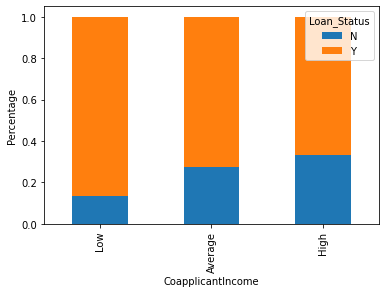

In [112]:
# plot the chart
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')

In [113]:
print(len(train[train["CoapplicantIncome"] == 0]))
print("Percentage of CoapplicantIncome = 0 is:",  len(train[train["CoapplicantIncome"] == 0])/len(train["CoapplicantIncome"]))

273
Percentage of CoapplicantIncome = 0 is: 0.44462540716612375


Biều đồ trên cho thấy mức thu nhập của đồng ứng viên (CoapplicantIncome) càng tháp thì tỉ lệ khoản vay được phê duyệt càng cao. Nhưng điều đó không đúng, bởi vì có khoảng 45% các ứng viên không có đồng ứng viên nào (CoapplicantIncome = 0), do đó việc phê duyệt các khoản vay không phụ thuộc vào nó. Vậy nên, ta tiến hành tạo một biến mới (Total_Income) là sự kết hợp của ApplicantIncome và CoapplicantIncome để hình dung hiệu quả về thu nhập với khả năng phê duyệt khoản vay.

In [114]:
# create a new variable
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

In [115]:
# making bins for Total Income variable
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
train['Total_Income_bin'] = pd.cut(train['Total_Income'], bins, labels=group)

Text(0, 0.5, 'Percentage')

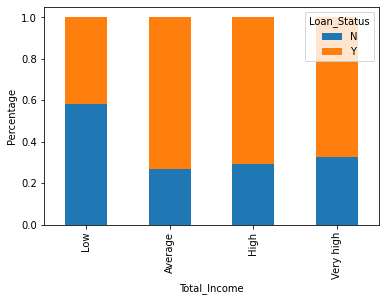

In [116]:
# plot the chart
Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')

Ta có thể thấy tỉ lệ khoản vay được phê duyệt ở các đơn có tổng thu nhập (Total_Income) thấp sẽ thấp hơn nhiều so với đơn có tổng thu nhập trung bình, cao hoặc rất cao.

Tiếp theo, chúng ta quan sát biến LoanAmout

In [117]:
# making bins for LoanAmount variable
bins = [0,100,200,700]
group = ['Low','Average','High']
train['LoanAmount_bin'] = pd.cut(df['LoanAmount'],bins,labels=group)

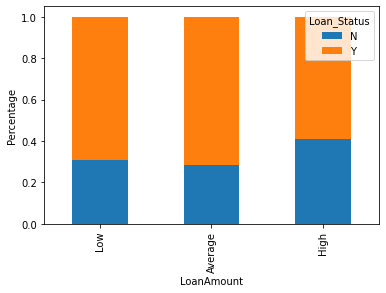

In [118]:
# plot the chart 
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

Ta có thể thấy có khoản vay với số tiền nhỏ hoặc trung bình có khả năng được phê duyệt cao hơn so với khoản vay với số tiền lớn.

Tiếp theo, ta sẽ xoá những biến ta thêm vào ở phần trước.

In [119]:
# before dropping
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,High,Average


In [120]:
# drop the new variable of bins
train = train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [121]:
# after dropping
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Chúng ta sẽ thay đổi giá trí 3+ trong biến Dependents thành 3 để biến nó thành biến số (numerical variable). Đồng thời đổi giá trị của biến mục tiêu (target variable) từ Y/N thành 1/0 để xem mối tương quan của nó với các biến số khác. Và một số mô hình chẳng hạn như Logistic Regression chỉ lấy các giá trị số làm đầu vào nên việc biến đổi là rất cần thiết.

In [122]:
# replacing 3+ in Dependents variable with 3 for both train and test set
train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)

In [123]:
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

In [124]:
# check the dataset
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


Tiếp theo, ta sẽ quan sát mối tương quan giữa các biến số bằng các sử dụng hàm corr() của thư viện Pandas, kết quả cho ra một ma trận vuông với các ô là giá trị tương quan giữa các cặp biến số. Sau đó, ta sử dụng bản đồ nhiệt (heatmap) để hình dung mối tương quan bằng cách trực quan các giá trị qua màu sắc, các ô càng có màu đậm hơn có nghĩa mối tương quan nhiều hơn.

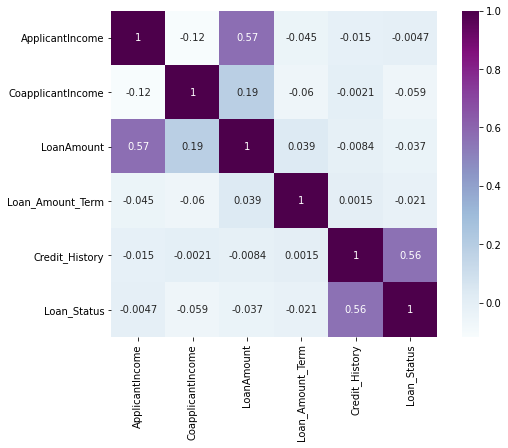

In [125]:
# calculate and visualize correlation matrix
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)

Ta thấy các cặp biến có tương quan nhiều nhất là:
*   ApplicantIncome - LoanAmount với hệ số tương quan là 0,57;
*   Credit_History - Loan_Status với hệ số tương quan là 0,56;
*   LoanAmount - CoapplicantIncome với hệ số tương quan là 0,19.


# <a name="">**4. Data Pre-processing**</a>
Tiền xử lý dữ liệu (Data Pre-processing) là một bước rất quan trọng trong việc giải quyết bất kỳ vấn đề nào trong lĩnh vực Machine Learning. Dữ liệu trong thế giới thực thường không đầy đủ, không nhất quán, thiếu một số hành vi, xu hướng nhất định và có khả năng chứa nhiều lỗi. Tiền xử lý dữ liệu là một phương pháp giải quyết các vấn đề đó.

Cụ thể trong bài toán này, ta sẽ xử lý các dữ liệu bị thiếu và các ngoại lệ, vì chúng sẽ gây ảnh hưởng xấu đến kết của của mô hình.

## **Missing Value Imputation**
Đầu tiên, chúng ta kiểm tra dữ liệu thiếu của các biến trong bộ dữ liệu.

In [126]:
# check for missing values in train set
train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [127]:
# check for missing values in test set
test.isnull().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Married               0
Loan_ID               0
dtype: int64

Ta thấy các biến có giá trị bị thiếu gồm: Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term và Credit_History. Ta sẽ lần lượt xử lý các dữ liệu bị thiếu trong từng biến.

Ta sẽ xem xét hai phương thức để điền vào các dữ liệu bị thiếu:
*   Đối với các biến số (numerical variables): điền vào bằng giá trị trung bình (mean) hoặc trung vị (median);
*   Đối với các biến phân loại (categorical variables): điền vào bằng giá trị có tần số xuất hiện nhiều nhất (mode).

Đầu tiên là các biến phân loại (categorical variables).

In [128]:
# replace missing values with the mode
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Tiếp theo, ta xem xét biến LoanAmount. Bởi vì LoanAmount là biến số (Numerical variable) nên ta sẽ dụng trung bình hoặc trung vị, tuy nhiên như đã xét ở phần trước, biến LoanAmount có rất nhiều ngoại lệ, giá trị trung bình sẽ bị ảnh hưởng bởi các ngoại lệ này nên ta quyết định chọn giá trị trung vị để điền vào dữ liệu bị thiếu.

In [129]:
# replace missing values with the median value due to outliers
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [130]:
# check whether all the missing values are filled in the Train dataset
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Các giá trị bị thiếu trong tập train đã được xử lý, tiếp theo ta xử lý trên tập test. Lưu ý, ta sẽ dùng các giá trị trung bình, trung vị hoặc mode của tập train để điền vào các dữ liệu thiếu ở tập test.

In [131]:
# replace missing values in Test set with mode/median from Training set
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [132]:
# check whether all the missing values are filled in the Test dataset
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Dữ liệu của ta đã hoàn toàn đầy đủ.

## **Outlier Treatment**
Như ta đã thấy ở phần phân tích đơn biến (Univariate analysis), biến LoanAmount chứa nhiều ngoại lệ, do đó chúng sẽ ảnh hưởng đến giá trị trung bình, độ lệch chuẩn dẫn đến ảnh hưởng phân phối của biển. Cụ thể, phần lớn dữ liệu trong LoanAmount nằm bên phía bên trái và đuôi bên phải dài hơn. Do đó phân phối bị lệch phải (lệch dương). Ta dùng log transformation để xử lý vấn đề này. Thực hiện log transformation sẽ không ảnh hưởng nhiều đến các giá trị nhỏ, nhưng làm giảm các giá trị ngoại lệ một cách rõ rệt. Vì vậy, chúng ta sẽ biến phân phối LoanAmount về dạng giống phân phối chuẩn hơn.

Text(0.5, 0, 'LoanAmount')

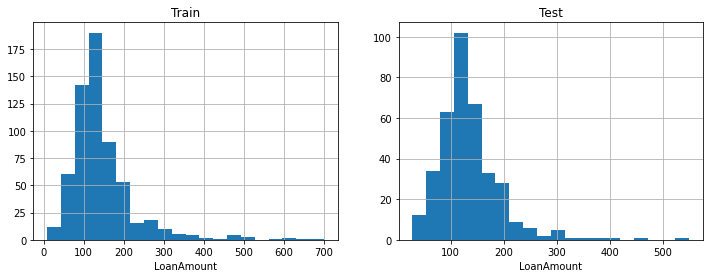

In [133]:
# before log transformation
ax1 = plt.subplot(121)
train['LoanAmount'].hist(bins=20, figsize=(12,4))
ax1.set_title("Train")
ax1.set_xlabel("LoanAmount")

ax2 = plt.subplot(122)
test['LoanAmount'].hist(bins=20)
ax2.set_title("Test")
ax2.set_xlabel("LoanAmount")

In [134]:
# remove skewness in LoanAmount variable by log transformation
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])

Text(0.5, 0, 'LoanAmount_log')

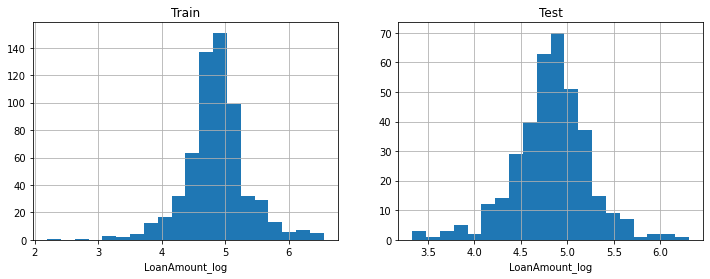

In [135]:
# after log transformation
ax1 = plt.subplot(121)
train['LoanAmount_log'].hist(bins=20, figsize=(12,4))
ax1.set_title("Train")
ax1.set_xlabel("LoanAmount_log")

ax2 = plt.subplot(122)
test['LoanAmount_log'].hist(bins=20)
ax2.set_title("Test")
ax2.set_xlabel("LoanAmount_log")

Sau khi xử lý bằng log transform, phân phối của biến LoanAmount giống phân phối chuẩn hơn, ảnh hưởng của các giá trị ngoại lệ đã giảm đi đáng kể.

# <a name="">**5. Model Development**</a>

## **Model Building: Part I**
Đầu tiên, ta xoá bỏ biến Loan_ID vì đó là biến định danh các ứng viên, không có bất kỳ ảnh hưởng nào đến biến mục tiêu Loan_Status. Ta thực hiện xoá bỏ trên cả tập train và test.

In [136]:
# drop Loan_ID 
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

Ta gán các biến độc lập vào biến X, biến mục tiêu vào biến y để chuẩn bị quá trình huấn luyện mô hình. 

In [137]:
# drop "Loan_Status" and assign it to target variable
X = train.drop('Loan_Status', axis=1)
y = train.Loan_Status

Ta sẽ sử dụng hàm get_dummies() trong thư viện Pandas để biến chuyển các biến độc lập phân loại có kiểu dữ liệu "object" thành kiểu số.

In [138]:
# adding dummies to the dataset
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [139]:
# show the shape of the dataset
X.shape, train.shape, test.shape

((614, 21), (614, 22), (367, 21))

In [140]:
# take a look at the top 5 rows of X
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1


### **Deafault Logistic Regression**

**Mô hình 1:** Chúng ta sẽ sử dụng mô hình Logistic Regression với các tham số mặc định để dự đoán bài toán phân lớp nhị phân này. Sử dụng các đọ đo Accuracy, Precison, Recall và F1-score để đánh giá mô hình.

In [141]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Cross-validation là một phương pháp kiểm tra độ chính xác của một mô hình dựa trên một tập dữ liệu học cho trước. Thay vì chỉ dùng một phần dữ liệu làm tập dữ liệu học thì cross-validation dùng toàn bộ dữ liệu để dạy cho máy. Cụ thể ở bài toán này, ta sử dụng phương pháp Stratified K-ford Cross Validation

In [142]:
# import StratifiedKFold from sklearn and fit the model
from sklearn.model_selection import StratifiedKFold

list_accuracy = []
list_precision = []
list_recall = []
list_f1 = []
i = 1

kf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    
    model = LogisticRegression()
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    
    acc = accuracy_score(yvl, pred_test)
    pre = precision_score(yvl, pred_test)
    rec = recall_score(yvl, pred_test)
    f1 = f1_score(yvl, pred_test)

    list_accuracy.append(acc)
    print('accuracy_score', acc)
    list_precision.append(pre)
    print('precision_score', pre)
    list_recall.append(rec)
    print('recall_score', rec)
    list_f1.append(f1)
    print('f1_score', f1)
    i+=1
    
mean_acc = sum(list_accuracy)/len(list_accuracy)
mean_pre = sum(list_precision)/len(list_precision)
mean_rec = sum(list_recall)/len(list_recall)
mean_f1 = sum(list_f1)/len(list_f1)

print("\nMean validation accuracy: ", mean_acc)
print("Mean validation precision: ", mean_pre)
print("Mean validation recall: ", mean_rec)
print("Mean validation f1: ", mean_f1)

result1 = [mean_acc, mean_pre, mean_rec, mean_f1]


1 of kfold 5
accuracy_score 0.7804878048780488
precision_score 0.7843137254901961
recall_score 0.9411764705882353
f1_score 0.8556149732620321

2 of kfold 5
accuracy_score 0.7886178861788617
precision_score 0.780952380952381
recall_score 0.9647058823529412
f1_score 0.8631578947368421

3 of kfold 5
accuracy_score 0.8211382113821138
precision_score 0.7924528301886793
recall_score 1.0
f1_score 0.8842105263157896

4 of kfold 5
accuracy_score 0.7967479674796748
precision_score 0.7920792079207921
recall_score 0.9523809523809523
f1_score 0.8648648648648649

5 of kfold 5
accuracy_score 0.819672131147541
precision_score 0.81
recall_score 0.9642857142857143
f1_score 0.8804347826086957

Mean validation accuracy:  0.801332800213248
Mean validation precision:  0.7919596289104096
Mean validation recall:  0.9645098039215686
Mean validation f1:  0.8696566083576448


## **Feature Engineering**
Feature Engineering là một kỹ thuật trích xuất, trích chọn hoặc tạo ra các đặc trưng quan trọng từ dữ liệu thô để sử dụng làm đại diện cho các mẫu dữ liệu huấn luyện. Một tập dữ liệu huấn luyện có thể có rất nhiều thuộc tính, nhưng không phải thuộc tính nào cũng cần thiết và quan trọng. Feature engineering là kỹ thuật giúp loại bỏ các thuộc tính dư thừa, làm đơn giản hóa quá trình biểu diễn dữ liệu nhưng không làm ảnh hưởng tới kết quả cuối cùng. Feature Engineering là một bước quan trọng trong lĩnh vực Machine Learning.

### **Feature Selection**
Ta tiến hành loại bỏ những biến dư thừa, không có ảnh hưởng đến biến mục tiêu. Thông qua kết quả phân tích trong phần Univariate Analysis, ta cần loại bỏ biến Gender và Self_Employed.

In [143]:
# drop the variables
train = train.drop(['Gender_Male', 'Gender_Female', 'Self_Employed_Yes', 'Self_Employed_No'], axis=1)
test = test.drop(['Gender_Male', 'Gender_Female', 'Self_Employed_Yes', 'Self_Employed_No'], axis=1)

### **Feature Construction**
Chúng ta có thể tạo ra các biến mới có thể ảnh hưởng đến biến mục tiêu, cụ thể là ba biến mới sau đây:

*   **Total_Income (Total Income)** - Như đã thảo luận trong phần Bivariate Analysis, ta sẽ kết hợp thu nhập của ứng viên (ApplicantIncome) và thu nhập của đồng ứng viên (CoapplicantIncome).  Nếu tổng thu nhập cao, cơ hội phê duyệt cho vay cũng có thể cao.
*   **EMI (Equated Monthly Installment)** - là số tiền hàng tháng mà các ứng viên phải trả để trả nợ.  Ý tưởng đằng sau việc tạo ra biến này là những người có EMI cao có thể gặp khó khăn trong việc trả lại khoản vay.  Ta có thể tính toán EMI bằng cách lấy tỷ lệ của khoản vay (LoanAmount) đối với thời hạn cho vay (Loan_Amount_Term).
*   **Balance_Income (Balance Income)** - Đây là thu nhập còn lại sau khi EMI đã được thanh toán.  Ý tưởng đằng sau việc tạo ra biến này là nếu giá trị này cao, khả năng cao là một người sẽ trả nợ và do đó làm tăng cơ hội phê duyệt khoản vay.

In [144]:
# combine ApplicantIncome and CoapplicantIncome into a new variable Total_Income
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

Text(0.5, 1.0, 'Test')

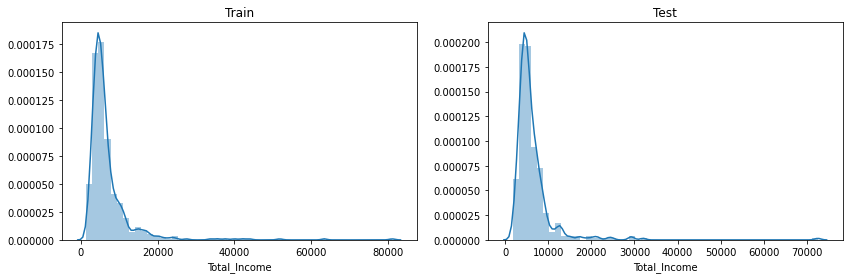

In [145]:
# check the distribution of Total_Income
# before log transformation
fig = plt.figure(figsize=(14,4))
ax1 = plt.subplot(121)
sns.distplot(train['Total_Income'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['Total_Income'])
ax1.set_title("Test")

Ta thấy phân phối của biến bị lệch phải, vì vậy ta sử dụng log transformation để đưa phân phối về dạng phân phối chuẩn.

In [146]:
# log transformation
train['Total_Income_log'] = np.log(train['Total_Income'])
test['Total_Income_log'] = np.log(test['Total_Income'])

Text(0.5, 1.0, 'Test')

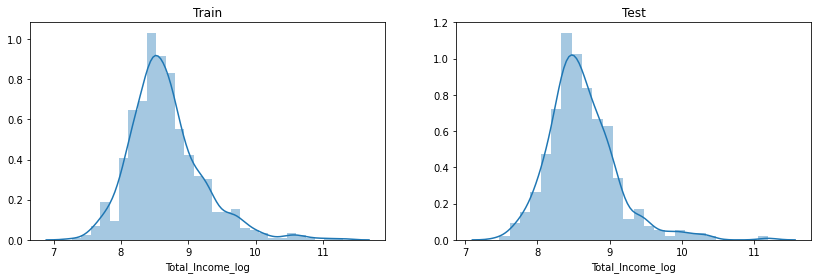

In [147]:
# after log transformation
fig = plt.figure(figsize=(14,4))
ax1 = plt.subplot(121)
sns.distplot(train['Total_Income_log'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['Total_Income_log'])
ax1.set_title("Test")

Bây giờ phân phối có dạng phân phối chuẩn hơn và ảnh hưởng của các giá trị ngoại lệ đã giảm đi đáng kể. 

Tiếp theo ta sẽ tạo biến EMI và Balance_Income, ta cũng sử dụng log transformation để đưa phân phối về dạng phân phối chuẩn.

In [148]:
# create EMI feature
train['EMI'] = train['LoanAmount'] / train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount'] / test['Loan_Amount_Term']

Text(0.5, 1.0, 'Test')

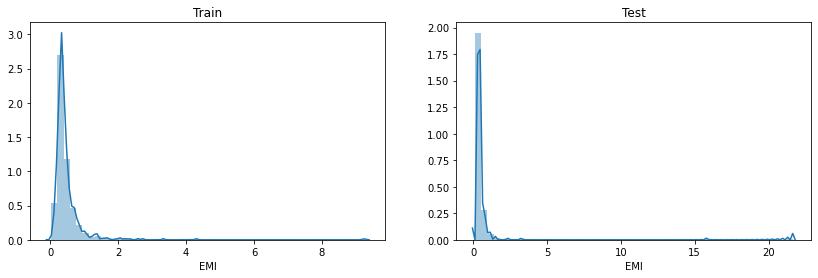

In [149]:
# check the distribution of EMI
# before log transformation
fig = plt.figure(figsize=(14,4))
ax1 = plt.subplot(121)
sns.distplot(train['EMI'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['EMI'])
ax1.set_title("Test")

In [150]:
# log transformation
train['EMI'] = np.log(train['EMI'])
test['EMI'] = np.log(test['EMI'])

Text(0.5, 1.0, 'Test')

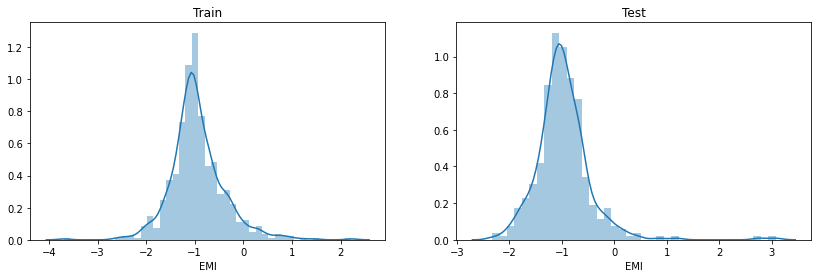

In [151]:
# after log transformation
fig = plt.figure(figsize=(14,4))
ax1 = plt.subplot(121)
sns.distplot(train['EMI'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['EMI'])
ax1.set_title("Test")

In [152]:
# create new "Balance_Income" variable
train['Balance_Income'] = train['Total_Income'] - (train['EMI']*1000) # Multiply with 1000 to make the units equal 
test['Balance_Income'] = test['Total_Income'] - (test['EMI']*1000)

Text(0.5, 1.0, 'Test')

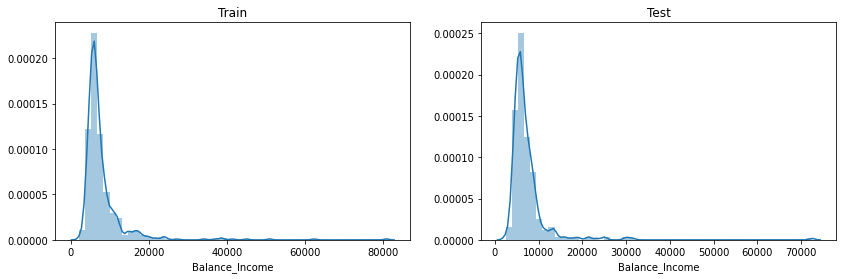

In [153]:
# check the distribution of Balance_Income
# before log transformation
fig = plt.figure(figsize=(14,4))
ax1 = plt.subplot(121)
sns.distplot(train['Balance_Income'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['Balance_Income'])
ax1.set_title("Test")

In [154]:
# log transformation
train['Balance_Income'] = np.log(train['Balance_Income'])
test['Balance_Income'] = np.log(test['Balance_Income'])

Text(0.5, 1.0, 'Test')

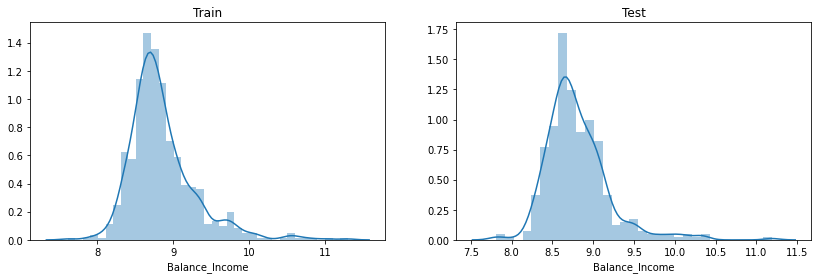

In [155]:
# after log transformation
fig = plt.figure(figsize=(14,4))
ax1 = plt.subplot(121)
sns.distplot(train['Balance_Income'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['Balance_Income'])
ax1.set_title("Test")

Ta tiếp hành xoá bỏ các biến cấu thành các biến Total_Income, EMI, Balance_Income mới tạo.

In [156]:
# drop the variables
train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income'], axis=1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income'], axis=1)

In [157]:
train.head()

,Credit_History,Loan_Status,LoanAmount_log,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income_log,EMI,Balance_Income
0,1.0,1,4.852030,1,0,0,1,0,0,1,0,0,0,1,8.674026,-1.034074,8.836821
1,1.0,0,4.852030,0,1,0,0,1,0,1,0,1,0,0,8.714568,-1.034074,8.871375
2,1.0,1,4.189655,0,1,0,1,0,0,1,0,0,0,1,8.006368,-1.696449,8.454562
3,1.0,1,4.787492,0,1,0,1,0,0,0,1,0,0,1,8.505323,-1.098612,8.706095
4,1.0,1,4.948760,1,0,0,1,0,0,1,0,0,0,1,8.699515,-0.937344,8.844674


## **Model Building: Part 2**

### **Logistic Regression + GridSearchCV**
**Mô hình 2:** Ta tiếp tục sử dụng mô hình Logistic Regression để dự đoán bài toán, tuy nhiên để nâng cao hiệu suất của mô hình, ta sẽ điều chỉnh tham số mô hình phù hợp. GridSearchCV là công cụ giúp ta tìm ra các tham số tối ưu cho mô hình, được tích hợp trong thư viên sklearn. Do đó, ta sẽ áp dụng GridSearchCV cho mô hình Logistic Regression để tối ưu mô hình này.

In [158]:
# import library
from sklearn.model_selection import GridSearchCV

# provide range of parameters
paramgrid={"C":np.arange(0, 210, 10), "penalty":["l1","l2"], "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}

# stratified 5 folds
kf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

# drop "Loan_Status" and assign it to target variable
X = train.drop('Loan_Status', axis=1)
y = train.Loan_Status 

# fit the grid search model
grid_search = GridSearchCV(LogisticRegression(), paramgrid, cv=kf)
grid_search.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
    

In [159]:
# show best parameters of model
grid_search.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [160]:
# best model
best_LR_model = grid_search.best_estimator_

In [161]:
list_accuracy = []
list_precision = []
list_recall = []
list_f1 = []
i = 1

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    
    model = best_LR_model
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    
    acc = accuracy_score(yvl, pred_test)
    pre = precision_score(yvl, pred_test)
    rec = recall_score(yvl, pred_test)
    f1 = f1_score(yvl, pred_test)

    list_accuracy.append(acc)
    print('accuracy_score', acc)
    list_precision.append(pre)
    print('precision_score', pre)
    list_recall.append(rec)
    print('recall_score', rec)
    list_f1.append(f1)
    print('f1_score', f1)
    i+=1
    
mean_acc = sum(list_accuracy)/len(list_accuracy)
mean_pre = sum(list_precision)/len(list_precision)
mean_rec = sum(list_recall)/len(list_recall)
mean_f1 = sum(list_f1)/len(list_f1)

print("\nMean validation accuracy: ", mean_acc)
print("Mean validation precision: ", mean_pre)
print("Mean validation recall: ", mean_rec)
print("Mean validation f1: ", mean_f1)

result2 = [mean_acc, mean_pre, mean_rec, mean_f1]


1 of kfold 5
accuracy_score 0.8211382113821138
precision_score 0.8118811881188119
recall_score 0.9647058823529412
f1_score 0.881720430107527

2 of kfold 5
accuracy_score 0.8048780487804879
precision_score 0.7850467289719626
recall_score 0.9882352941176471
f1_score 0.875

3 of kfold 5
accuracy_score 0.8130081300813008
precision_score 0.7850467289719626
recall_score 1.0
f1_score 0.8795811518324607

4 of kfold 5
accuracy_score 0.8048780487804879
precision_score 0.7884615384615384
recall_score 0.9761904761904762
f1_score 0.8723404255319148

5 of kfold 5
accuracy_score 0.8360655737704918
precision_score 0.8137254901960784
recall_score 0.9880952380952381
f1_score 0.8924731182795699

Mean validation accuracy:  0.8159936025589765
Mean validation precision:  0.7968323349440707
Mean validation recall:  0.9834453781512605
Mean validation f1:  0.8802230251502945


### **XGBoost Classifier + GridSearchCV**
**Mô hình 3:** XGBoost (Extreme Gradient Boosting) là một thuật toán dựa trên cây quyết định tăng cường độ dốc (gradient boosting decision trees). XGBoost là một thuật toán nhanh và hiệu quả, đã được sử dụng bởi những người chiến thắng trong nhiều cuộc thi khoa học dữ liệu. Ở mô hình này ta sẽ sử dụng XGBoost Classifier và áp dụng GridSearchCV tìm ta các tham số phù hợp để tối ưu mô hình. 

In [162]:
# import library
from xgboost import XGBClassifier

# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {"max_depth": np.arange(1, 20, 2), "n_estimators": np.arange(1, 200, 20), "booster":["gbtree", "gblinear"], "min_child_weight":np.arange(1,11,1)}

# stratified 5 folds
kf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

# fit the grid search model
grid_search = GridSearchCV(XGBClassifier(), paramgrid, cv=kf)
grid_search.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logi...
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'booster': ['gbtree', 'gblinear'],
                         'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_child_weight':

In [163]:
# show best parameters of model
grid_search.best_params_

{'booster': 'gbtree',
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 61}

In [164]:
# best model
best_XGB_model = grid_search.best_estimator_

In [165]:
list_accuracy = []
list_precision = []
list_recall = []
list_f1 = []
i = 1

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    
    model = best_XGB_model
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    
    acc = accuracy_score(yvl, pred_test)
    pre = precision_score(yvl, pred_test)
    rec = recall_score(yvl, pred_test)
    f1 = f1_score(yvl, pred_test)

    list_accuracy.append(acc)
    print('accuracy_score', acc)
    list_precision.append(pre)
    print('precision_score', pre)
    list_recall.append(rec)
    print('recall_score', rec)
    list_f1.append(f1)
    print('f1_score', f1)
    i+=1
    
mean_acc = sum(list_accuracy)/len(list_accuracy)
mean_pre = sum(list_precision)/len(list_precision)
mean_rec = sum(list_recall)/len(list_recall)
mean_f1 = sum(list_f1)/len(list_f1)

print("\nMean validation accuracy: ", mean_acc)
print("Mean validation precision: ", mean_pre)
print("Mean validation recall: ", mean_rec)
print("Mean validation f1: ", mean_f1)

result3 = [mean_acc, mean_pre, mean_rec, mean_f1]


1 of kfold 5
accuracy_score 0.8130081300813008
precision_score 0.803921568627451
recall_score 0.9647058823529412
f1_score 0.877005347593583

2 of kfold 5
accuracy_score 0.7967479674796748
precision_score 0.7884615384615384
recall_score 0.9647058823529412
f1_score 0.8677248677248677

3 of kfold 5
accuracy_score 0.8373983739837398
precision_score 0.8076923076923077
recall_score 1.0
f1_score 0.8936170212765957

4 of kfold 5
accuracy_score 0.7886178861788617
precision_score 0.79
recall_score 0.9404761904761905
f1_score 0.858695652173913

5 of kfold 5
accuracy_score 0.8360655737704918
precision_score 0.8137254901960784
recall_score 0.9880952380952381
f1_score 0.8924731182795699

Mean validation accuracy:  0.8143675862988138
Mean validation precision:  0.8007601809954752
Mean validation recall:  0.9715966386554623
Mean validation f1:  0.8779032014097059


# <a name="">**6. Evaluation and Prediction**</a>

## **Evaluation**
Ta tiến hành so sánh kết quả dự đoán của 3 mô hình:
*   Mô hình 1: Logistic Regression với tham số mặc định;
*   Mô hình 2: Logistic Regression + tinh chỉnh tham số bằng GridSearchCV;
*   Mô hình 3: XGBoost Classifier + tinh chỉnh tham số bằng GridSearchCV.

Ta tạo Dataframe để hiển thị các kết quả độ đo đã được lưu trước đó.


In [166]:
# create a dataframe to compare 3 model's score
model = ['Deafault Logistic Regression', 'Logistic Regression + GridSearchCV', 'XGBoost Classifier + GridSearchCV']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
compare_tb = pd.DataFrame(zip(result1, result2, result3), columns=model, index=metrics)
compare_tb

,Deafault Logistic Regression,Logistic Regression + GridSearchCV,XGBoost Classifier + GridSearchCV
Accuracy,0.801333,0.815994,0.814368
Precision,0.791960,0.796832,0.800760
Recall,0.964510,0.983445,0.971597
F1-score,0.869657,0.880223,0.877903


Ta thấy các đối với các độ đo Accuracy, Recall và F1-score thì mô hình 2 (Logistic Regression + GridSearchCV) cho kết quả cao nhất, ở độ dô Precision thì mô hình 3 (XGBoost Classifier + GridSearchCV) cho kết quả cao nhất. Nhìn chung 2 mô hình này cho kết quả khá tốt và chêch lệch rất ít.

Vì bộ dữ liệu này không cân bằng do đó ta không nên sử dụng Accuracy để đánh giá. 

Precsion ở trong bài toán này thể hiện tỉ lệ số ứng viên thực sự được duyệt khoản vay so với tổng số ứng viên được dự đoán là sẽ được phê duyệt khoản vay. Ta thấy Precision là một độ đo quan trọng vì nếu Precision thấp thì tỉ lệ ngân hàng phê duyệt khoản vay không chính xác cao. Tức là ngân hàng sẽ phê duyệt khoản vay nhiều ứng viên trong khi thực tế thì các ứng viên đó không được phê duyệt, như vậy ngân hàng sẽ gặp rủi ro tín dụng cao. 

Recall thể hiện trong số các ứng viên thực sự được phê duyệt, có bao nhiêu ứng viên được dự đoán là sẽ được phê duyệt khoản vay. Recall cũng là một độ đo quan trọng vì nếu Recall thấp thì ngân hàng sẽ bỏ lỡ nhiều ứng viên tiềm năng để cho vay, như vậy ngân hàng sẽ không đem lại lợi nhuận được.

Vì vậy ta sẽ dụng dụng độ đo F1-score để đánh giá đánh giá 2 mô hình này. F1-score là trung bình điều hoà (harmonic mean) giữa Precision và Recall, F1-score được sử dụng khi cần sự cân bằng giữa Precision và Recall và hơn nữa F1-score cũng rất phù hợp cho bộ dữ liệu không cân bằng. 

Ta quyết định chọn mô hình có F1-score cao nhất là mô hình 2 để dự đoán trên tập test. 

## **Prediction**
Ta tạo biến mục tiêu Loan_Status cần dự đoán trên bộ test chưa qua chỉnh sửa. Gán giá trị được dự đoán bằng mô hình 2 cho biến đó.

In [170]:
# predict Loan_Status variable of test set
test_original['Loan_Status'] = best_LR_model.predict(test)

In [183]:
# take a look at the top 5 rows of the test set after predicting
test_original.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y


Thay giá trị của biến Loan_Status từ 1 - 0 thành Y - N để đúng định dạng ban đầu.

In [177]:
# replacing 1 and 0 in Loan_Status variable with Y and N
test_original['Loan_Status'].replace(1, 'Y', inplace=True)
test_original['Loan_Status'].replace(0, 'N', inplace=True)

Xem số lượng của mỗi lớp sau khi được dự đoán.

In [179]:
# count of each category in that variable
test_original['Loan_Status'].value_counts()

Y    306
N     61
Name: Loan_Status, dtype: int64

Cuối cùng ta lưu kết quả bộ test được dự đoán thành file .csv

In [180]:
# convert to CSV file, without row index
test_original.to_csv('LR_Prediction.csv', index=False)